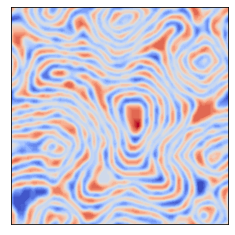

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as ani

def lap(A,p,q):
    # Approximation of Laplacian of A with periodic boundary conditions
    lapA = np.zeros_like(A)
    lapA = (np.roll(A, -1, axis=0) - 2*A + np.roll(A, 1, axis=0) ) / (q**2)
    lapA += (np.roll(A, -1, axis=1) - 2*A + np.roll(A, 1, axis=1) ) / (p**2)
    return lapA

# Dimensions of simulation
width = 2.5
height = 2.5

# Number of grid points in x, then y
M = 256
N = 256

# Timestep size and number of steps
t = 1.
T = 80000

Du = 2e-5
Dv = 1e-5
    
# Other paramters

F = .02
k = .045

#  Initial conditions of U and V
U = np.ones((N,M))
V = np.zeros((N,M))

U[118:138, 118:138] = .5 * (1 + .02*(np.random.random_sample((20,20)) - .5))
V[118:138, 118:138] = .25 * (1 + .02*(np.random.random_sample((20,20)) - .5))

# END of parameters

# Grid spacing in x, y
p = width / M
q = height / N

Animate = False

if not Animate:
    for i in range(T):
        U = U + t*( Du*lap(U,p,q) - U*V**2 + F*(1-U) )
        V = V + t*( Dv*lap(V,p,q) + U*V**2 - (F+k)*V )
    
    fig = plt.figure()
    ax = plt.axes()
    
    ax.imshow(U, cmap='coolwarm', interpolation='spline16')
    ax.set_xticks(())
    ax.set_yticks(())

if Animate:
    def take_timestep(n):
        global U,V,t,Du,Dv,f,k
        for i in range(n):
            U = U + t*( Du*lap(U,p,q) - U*V**2 + F*(1-U) )
            V = V + t*( Dv*lap(V,p,q) + U*V**2 - (F+k)*V )

    for i in range(500):
        plt.imsave(f'img{i}.png', U, cmap = 'coolwarm')
        take_timestep(200)

    plt.imshow(U, cmap='coolwarm')

Text(0.5, 0, 't')

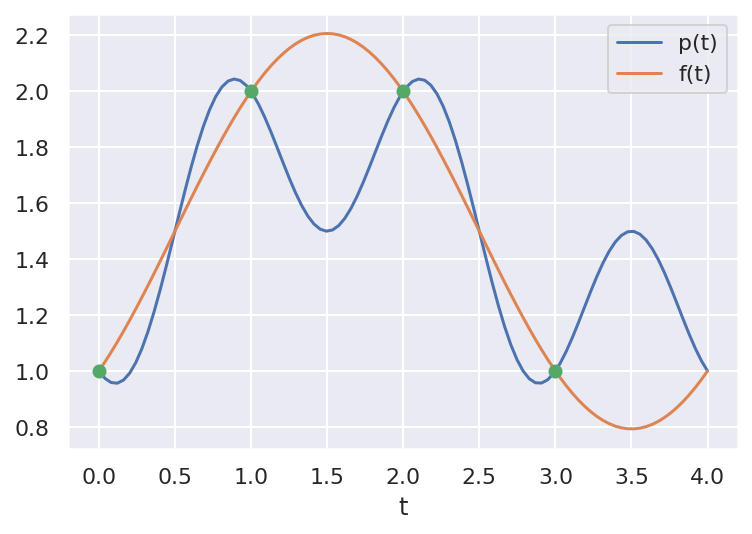

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcdefaults
rcdefaults()  # restore default matplotlib rc parameters
%config InlineBackend.figure_format='retina'  
import seaborn as sns  # wrapper for matplotlib that provides prettier styles and more
import matplotlib.pyplot as plt  # use matplotlib functionality directly
%matplotlib inline  
sns.set()

t = np.linspace(0,4,100)
p = np.real( .25*(6 + (-1-1j)*np.exp(np.pi*1j/2*t) + (-1+1j)*np.exp(np.pi*3j/2*t)) )
f = np.real( .25*(6 + (-1-1j)*np.exp(np.pi*1j/2*t) + (-1+1j)*np.exp(np.pi*-1j/2*t)) )
plt.plot(t,p,t,f)
plt.plot([0,1,2,3], [1,2,2,1], '.', markersize=12)
plt.legend(('p(t)','f(t)'))
plt.xlabel('t')

p = np.real( .25*(6 + (-1-1j)*np.exp(np.pi*1j/2*t) + (-1+1j)*np.exp(np.pi*3j/2*t)) )
f = np.real( .25*(6 + (-1-1j)*np.exp(np.pi*1j/2*t) + (-1+1j)*np.exp(np.pi*-1j/2*t)) )
plt.plot(t,p,t,f)
plt.plot([0,1,2,3], [1,2,2,1], '.', markersize=12)
plt.legend(('p(t)','f(t)'))
plt.xlabel('t')

Text(0.5, 0, 't')

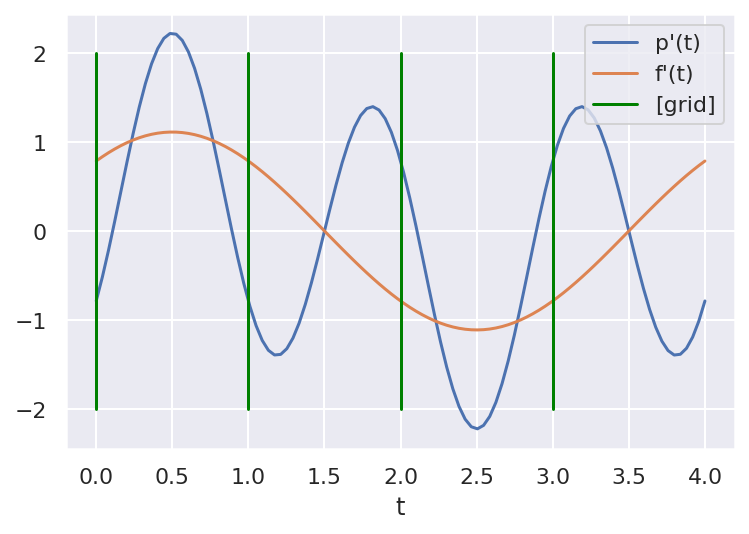

In [39]:
p = np.real( np.pi/8*((1-1j)*np.exp(np.pi*1j/2*t) + (-3-3j)*np.exp(np.pi*3j/2*t)) )
f = np.real( np.pi/8*((1-1j)*np.exp(np.pi*1j/2*t) + (1+1j)*np.exp(np.pi*-1j/2*t)) )
plt.plot(t,p,t,f)
plt.plot([[0,1,2,3],[0,1,2,3]], [[-2,-2,-2,-2],[2,2,2,2]], color='green')
plt.legend(('p\'(t)','f\'(t)', '[grid]'), loc='upper right')
plt.xlabel('t')